In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Taxifare.csv',parse_dates=[2])
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [22]:
df.columns = ['uid','fare','pickup_dt','long_pickup','lat_pickup','long_drop','lat_drop','pass#']
df.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [23]:
df.shape

(50000, 8)

In [24]:
df.dtypes

uid                         object
fare                       float64
pickup_dt      datetime64[ns, UTC]
long_pickup                float64
lat_pickup                 float64
long_drop                  float64
lat_drop                   float64
pass#                        int64
dtype: object

In [10]:
df['uid'].nunique()

3597

In [13]:
df['uid'][:4]

0    26:21.0
1    52:16.0
2    35:00.0
3    30:42.0
Name: uid, dtype: object

In [12]:
df.duplicated().sum()

0

In [25]:
df1 = df.copy()
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [26]:
df.dtypes

uid                         object
fare                       float64
pickup_dt      datetime64[ns, UTC]
long_pickup                float64
lat_pickup                 float64
long_drop                  float64
lat_drop                   float64
pass#                        int64
dtype: object

#### Univariate Data Analysis

#### Passenger Count

In [32]:
d1 = df1['pass#'].value_counts()
d1

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: pass#, dtype: int64

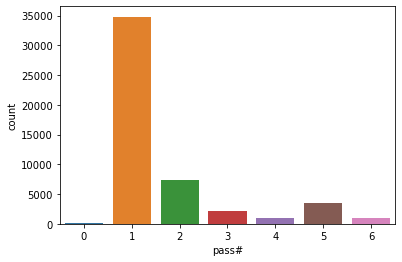

In [34]:
sns.countplot(x=df1['pass#'])
plt.show()

#### Inference
1) 165 rides have 0 passengers<br>
2) Around 70% rides have solo passengers.<br>

#### Fare

In [35]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#'],
      dtype='object')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


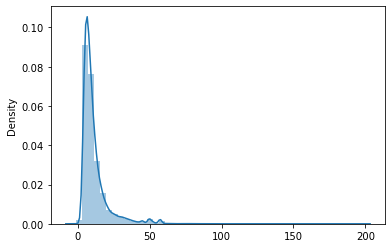

In [36]:
sns.distplot(x=df1['fare'])
plt.show()

In [37]:
df1['fare'].describe(percentiles=[0.01,0.02,0.98,0.99])

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
1%           3.300000
2%           3.500000
50%          8.500000
98%         46.500000
99%         52.000000
max        200.000000
Name: fare, dtype: float64

In [41]:
print(df1[df1['fare']<3.3].shape)
print(df1[df1['fare']>52].shape)

(415, 8)
(498, 8)


In [42]:
df1['fare'] = np.where(df1['fare']<3.30,3.30,df1['fare'])
df1['fare'] = np.where(df1['fare']>52.0,52.0,df1['fare'])
df1['fare'].describe(percentiles=[0.01,0.02,0.98,0.99])

count    50000.000000
mean        11.258561
std          8.971459
min          3.300000
1%           3.300000
2%           3.500000
50%          8.500000
98%         46.500000
99%         52.000000
max         52.000000
Name: fare, dtype: float64

In [43]:
df.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#'],
      dtype='object')

#### Note
1) Latitude range from -90 to 90<br>
2) Longitude ranges from -180 to 180<br>

In [46]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#'],
      dtype='object')

In [47]:
print(df1[df1['lat_pickup']<-90].shape)
print(df1[df1['lat_pickup']>90].shape)

print(df1[df1['lat_drop']<-90].shape)
print(df1[df1['lat_drop']>90].shape)

(0, 8)
(1, 8)
(0, 8)
(0, 8)


In [50]:
df1.drop(df1[df1['lat_pickup']>90].index,axis=0,inplace=True)

In [48]:
print(df1[df1['long_pickup']<-180].shape)
print(df1[df1['long_pickup']>180].shape)

print(df1[df1['long_drop']<-180].shape)
print(df1[df1['long_drop']>180].shape)

(0, 8)
(0, 8)
(0, 8)
(0, 8)


In [51]:
df1.shape

(49999, 8)

In [53]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#'],
      dtype='object')

In [56]:
df1[['lat_pickup','long_pickup','lat_drop','long_drop']].describe(percentiles=[0.01,0.02,0.98,0.99])
# Lat -> 40.7128° N, Long -> 74.0060° W
# Lat ->        40.730610
# Longitude -> -73.935242

,lat_pickup,long_pickup,lat_drop,long_drop
count,49999.000000,49999.000000,49999.000000,49999.000000
mean,39.926536,-72.509727,39.926234,-72.504587
std,6.011729,10.393962,6.014796,10.407672
min,-74.006893,-75.423848,-74.006377,-84.654241
1%,0.000000,-74.014444,0.000000,-74.015120
2%,40.579934,-74.010458,40.564411,-74.011755
50%,40.752677,-73.981840,40.753371,-73.980083
98%,40.799637,-73.137393,40.810248,-73.422927
99%,40.807110,0.000000,40.832502,0.000000
max,43.098708,40.783472,43.415190,40.851027


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


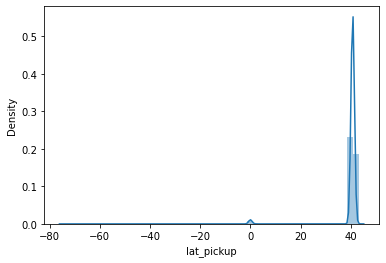

In [60]:
sns.distplot(df1['lat_pickup'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


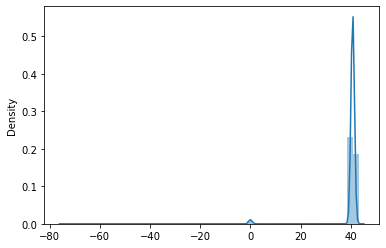

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


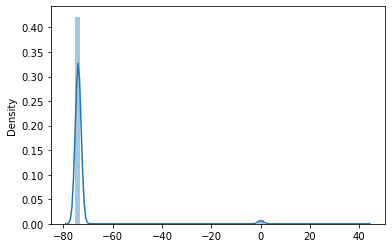

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


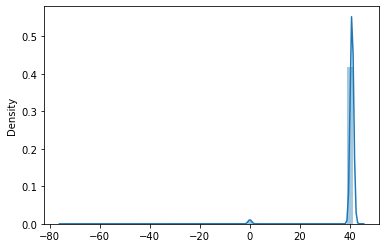

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


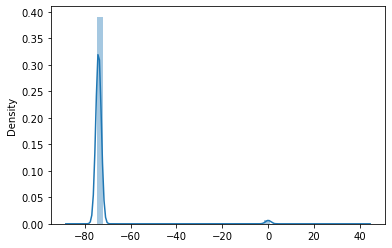

In [65]:
coor_cols = ['lat_pickup','long_pickup','lat_drop','long_drop']
for i in coor_cols:
    sns.distplot(x=df1[i])
    plt.show()

In [66]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#'],
      dtype='object')

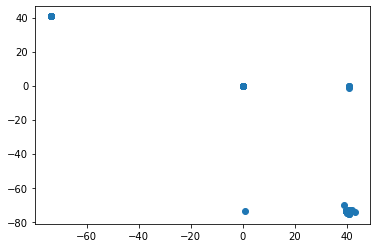

In [68]:
plt.scatter(df1['lat_pickup'],df1['long_pickup'])
plt.show()

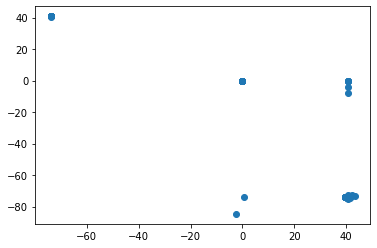

In [69]:
plt.scatter(df1['lat_drop'],df1['long_drop'])
plt.show()

#### Note
Minkowskis distance = (|x2-x1|^p + |y2-y1|^p)^(1/p)<br>
For p=2 => Euclidean Dist (x1,y1),(x2,y2) = sqrt((x2-x1)^2 + (y2-y1)^2)<br>
For p=1 =>  Manhattan Dist (x1,y1),(x2,y2) = |x2-x1| + |y2-y1|

In [73]:
def minkowski(x1,x2,y2,y1,p):
    min_dist = (abs(x2-x1)**p + abs(y2-y1)**p)**(1/p)
    return min_dist


In [74]:
df1['Euclid_dist'] = minkowski(df1['lat_drop'],df1['lat_pickup'],
                              df1['long_drop'],df1['long_pickup'],2)
df1['Manhattan_dist'] = minkowski(df1['lat_drop'],df1['lat_pickup'],
                              df1['long_drop'],df1['long_pickup'],1)

In [75]:
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194


#### Haversine Distance

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).
Latitude and longitude are measured in radians

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

<img src="haversine_dist.png">

In [77]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [78]:
df1['haversine_dist'] = haversine_np(df1['long_pickup'], df1['lat_pickup'],
                                    df1['long_drop'], df1['lat_drop'])

In [81]:
df1.head(2)

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134


In [82]:
df1['abs_diff_long'] = abs(df1['long_drop'] - df1['long_pickup'])
df1['abs_diff_lat'] = abs(df1['lat_drop'] - df1['lat_pickup'])
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754


In [85]:
df1['fare_bin'] = pd.cut(df1['fare'],bins=list(range(0,60,5)))
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]"
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]"
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]"
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]"
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]"


In [86]:
df1['fare_bin'].value_counts()

(5, 10]     23437
(10, 15]     9959
(0, 5]       7703
(15, 20]     3681
(20, 25]     1643
(25, 30]      995
(30, 35]      774
(50, 55]      636
(35, 40]      429
(45, 50]      396
(40, 45]      346
Name: fare_bin, dtype: int64

### Model - 1

In [87]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'fare_bin'],
      dtype='object')

In [89]:
y = df1['fare']
x = df1[['pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat']]
# x = df1.iloc[:,[7,8,9,10,11,12]]
print(x.shape)
print(y.shape)

(49999, 6)
(49999,)


In [98]:
print(x.dtypes)
print(y.dtypes)

pass#               int64
Euclid_dist       float64
Manhattan_dist    float64
haversine_dist    float64
abs_diff_long     float64
abs_diff_lat      float64
dtype: object
float64


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                               random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37499, 6)
(12500, 6)
(37499,)
(12500,)


In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [94]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    r2s = r2_score(y_test,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
m1 = RandomForestRegressor(n_estimators=70,criterion='mse',max_depth=5)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training Score 0.798981548552738
Testing Score 0.7910234683040944
MAE 2.2599681968520486
MSE 16.513470588300585
RMSE 4.063676978833405
R2_Score 0.7910234683040944


In [107]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_})
fimp_m1.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
1,Euclid_dist,0.947537
4,abs_diff_long,0.023694
3,haversine_dist,0.016002
2,Manhattan_dist,0.007605
5,abs_diff_lat,0.005054
0,pass#,0.000108


In [108]:
df1.to_csv('taxi_fare_m1_17Jun.csv')

In [110]:
df2 = pd.read_csv('taxi_fare_m1_17Jun.csv')
df2.head()

,Unnamed: 0,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin
0,0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]"
1,1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]"
2,2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]"
3,3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]"
4,4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]"


### Model Saving

#### Method-1

In [115]:
import pickle

In [116]:
# Model Saving
# wb = write binary
pickle.dump(m1, open('m1_pickle_17jun.sav', 'wb'))

In [124]:
# rb = read binary
loaded_model = pickle.load(open('m1_pickle_17jun.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7910234683040944


#### Method-2

In [126]:
import joblib

In [127]:
joblib.dump(m1, 'm1_joblib_17jun.sav')

['m1_joblib_17jun.sav']

In [128]:
loaded_model_joblib = joblib.load('m1_joblib_17jun.sav')
result2 = loaded_model_joblib.score(x_test, y_test)
print(result2)

0.7910234683040944


In [130]:
df1.head(2)

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]"
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]"


#### Creating Datetime Columns

In [131]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'fare_bin'],
      dtype='object')

In [134]:
df1.dtypes

uid                            object
fare                          float64
pickup_dt         datetime64[ns, UTC]
long_pickup                   float64
lat_pickup                    float64
long_drop                     float64
lat_drop                      float64
pass#                           int64
Euclid_dist                   float64
Manhattan_dist                float64
haversine_dist                float64
abs_diff_long                 float64
abs_diff_lat                  float64
fare_bin                     category
dtype: object

In [135]:
df1['pickup_dt'][:5]

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_dt, dtype: datetime64[ns, UTC]

In [136]:
df1['Year'] = df1['pickup_dt'].dt.year
df1['Quarter'] = df1['pickup_dt'].dt.quarter
df1['Month'] = df1['pickup_dt'].dt.month

In [138]:
df1.head(2)

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,Year,Quarter,Month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1


In [139]:
df1['Hour']  = df1['pickup_dt'].apply(lambda x : x.hour)
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,Year,Quarter,Month,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]",2011,3,8,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,2.799270,0.004437,0.024949,"(5, 10]",2012,2,4,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,1.999157,0.011440,0.015754,"(5, 10]",2010,1,3,7


In [140]:
df1['Minute']  = df1['pickup_dt'].apply(lambda x : x.minute)
df1.head(3)

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,haversine_dist,abs_diff_long,abs_diff_lat,fare_bin,Year,Quarter,Month,Hour,Minute
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,1.030764,0.002701,0.009041,"(0, 5]",2009,2,6,17,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,8.450134,0.036780,0.070701,"(15, 20]",2010,1,1,16,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,1.389525,0.008504,0.010708,"(5, 10]",2011,3,8,0,35


In [144]:
hrly_sum_fare = df1.groupby(['Hour'])['fare'].sum()
hrly_sum_fare.sort_values(ascending=False)

Hour
18    33952.91
19    33315.39
22    30926.22
21    30870.17
20    30335.36
14    29525.87
13    28581.50
15    28037.83
17    27928.02
23    27834.50
12    27704.75
11    25825.42
9     24988.61
16    24751.32
10    24249.59
8     23300.00
0     22461.62
7     20871.88
1     17212.50
6     12333.18
2     12122.60
3      9893.39
4      8290.21
5      7611.93
Name: fare, dtype: float64

In [145]:
monthly_fare_sum = df1.groupby(['Month'])['fare'].sum()
monthly_fare_sum.sort_values(ascending=False)

Month
5     54001.37
3     51551.31
6     51413.48
4     50813.47
1     48259.00
2     46522.53
10    46375.96
12    46278.33
9     45199.64
11    43274.56
7     39694.00
8     39541.12
Name: fare, dtype: float64

In [147]:
qrtly_fare_sum = df1.groupby(['Quarter'])['fare'].sum()
qrtly_fare_sum.sort_values(ascending=False)

Quarter
2    156228.32
1    146332.84
4    135928.85
3    124434.76
Name: fare, dtype: float64

In [148]:
yearly_fare_sum = df1.groupby(['Year'])['fare'].sum()
yearly_fare_sum.sort_values(ascending=False)

Year
2014    97304.29
2013    96025.44
2012    89033.90
2011    81666.47
2009    77159.24
2010    77100.96
2015    44634.47
Name: fare, dtype: float64

In [150]:
df1['Day_Q1'] = np.where((df1['Hour']>0) & (df1['Hour']<=6),1,0)
df1['Day_Q2'] = np.where((df1['Hour']>6) & (df1['Hour']<=12),1,0)
df1['Day_Q3'] = np.where((df1['Hour']>12) & (df1['Hour']<=18),1,0)
df1['Day_Q4'] = np.where((df1['Hour']>18) & (df1['Hour']<=0),1,0)
df1.head()

,uid,fare,pickup_dt,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Euclid_dist,Manhattan_dist,...,fare_bin,Year,Quarter,Month,Hour,Minute,Day_Q1,Day_Q2,Day_Q3,Day_Q4
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,0.011742,...,"(0, 5]",2009,2,6,17,26,0,0,1,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,0.107481,...,"(15, 20]",2010,1,1,16,52,0,0,1,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,0.019212,...,"(5, 10]",2011,3,8,0,35,0,0,0,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,0.029386,...,"(5, 10]",2012,2,4,4,30,1,0,0,0
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,0.027194,...,"(5, 10]",2010,1,3,7,51,0,1,0,0


In [152]:
df1.columns

Index(['uid', 'fare', 'pickup_dt', 'long_pickup', 'lat_pickup', 'long_drop',
       'lat_drop', 'pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'fare_bin', 'Year', 'Quarter', 'Month',
       'Hour', 'Minute', 'Day_Q1', 'Day_Q2', 'Day_Q3', 'Day_Q4'],
      dtype='object')

#### Model - 2


In [153]:
x1 = df1[['pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'Year', 'Quarter', 'Month',
       'Hour', 'Minute', 'Day_Q1', 'Day_Q2', 'Day_Q3', 'Day_Q4']]
y1 = df1['fare']

In [157]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,random_state=30)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(37499, 15)
(12500, 15)
(37499,)
(12500,)


In [155]:
print(x_train1.columns)

Index(['pass#', 'Euclid_dist', 'Manhattan_dist', 'haversine_dist',
       'abs_diff_long', 'abs_diff_lat', 'Year', 'Quarter', 'Month', 'Hour',
       'Minute', 'Day_Q1', 'Day_Q2', 'Day_Q3', 'Day_Q4'],
      dtype='object')


In [159]:
m2 = RandomForestRegressor(n_estimators=40)
m2.fit(x_train1,y_train1)

RandomForestRegressor(n_estimators=40)

In [160]:
gen_metrics(m2,x_train1,x_test1,y_train1,y_test1)

Training Score 0.9708200349333536
Testing Score 0.8034459725492507
MAE 2.096343073333333
MSE 15.519694088614997
RMSE 3.9395042947831644
R2_Score 0.8034459725492507


In [ ]:
#### Apply HyperParamter Tuning - GrdiSearchCV and/or RandomisedSearchCV
#### Apply LinearReg, DTRegressor as well.

In [ ]:
# !pip install xgboost

In [161]:
import xgboost

In [ ]:
# LinReg
# LogReg
# DT
# RF
# Ensmble
# AdaBoost
# XGBoost
# KNN
# SVM
# Naive Bayes


# # Unsupervised
# 1) KMeans Clustering
# 2) Agglomerative Clustering
# 3) PCA (Principal Component Analysis)
# 4) Time Series - ARIMA


# # Deep Learning
# 1) ANN
# 2) CNN
# 3) RNN
# 4) NLP
# 5) Computer Vision


